## Unsupervised Machine Learning
Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

- Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
- Association:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

### What is Clustering?
“Clustering” is the process of grouping similar entities together. The goal of this unsupervised machine learning technique is to find similarities in the data point and group similar data points together.

<img src='https://cdn-images-1.medium.com/max/800/1*HGxubBB0IKpNKW0Odo7lhw.gif'/>

### K-means 
It is one of the simplest unsupervised learning algorithms that solve the clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centers, one for each cluster.



### Algorithm
To start with k-means algorithm, you first have to randomly initialize points called the cluster centroids (K). K-means is an iterative algorithm and it does two steps: 
1. Cluster assignment 
<img src = 'https://cdn-images-1.medium.com/max/800/1*fG8u8nV7qR91wDyFDEEV-g.png' />
2. Move centroid step.
<img src ='https://cdn-images-1.medium.com/max/800/0*rrzG3LyOnAvOepbJ.png' />


### Steps Performed
- Choose a value of k, number of clusters to be formed.

- Randomly select k data points from the data set as the intital cluster centeroids/centers

- For each datapoint:

    - Compute the distance between the datapoint and the cluster centroid

    - Assign the datapoint to the closest centroid


- For each cluster calculate the new mean based on the datapoints in the cluster.

- Repeat 3 & 4 steps until mean of the clusters stops changing or maximum number of iterations reached.



<img src = 'https://cdn-images-1.medium.com/max/800/1*WkU1q0Cuha2QKU5JnkcZBw.gif'/>

### Distortion Function
<img src='https://cdn-images-1.medium.com/max/800/1*KYw29F70CmhJH1DquI8xbA.png' />

### How to select the best K
The algorithm clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE)
<img src = 'https://cdn-images-1.medium.com/max/800/0*49xV2Py0xhBLc5D0.png' />

### Problems :
1. The result might not be globally optimal: We can’t assure that this algorithm will lead to the best global solution. Selecting different random seeds at the beginning affects the final results.

2. Value of K need to be specified beforehand: We can expect this value only if we have a good idea about our dataset and if we are working with a new dataset then elbow method can be used to determine value of K.

3. Works only for linear boundaries: K-means makes this assumption that the boundaries will be always linear. Hence it fails when it comes to complicated boundaries.

4. Slow for large number of samples: As this algorithm access each point of the dataset, it becomes slow when the sample size grows.

### Uses

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

#### Behavioral segmentation:
- Segment by purchase history
- Segment by activities on application, website, or platform
- Define personas based on interests
- Create profiles based on activity monitoring

#### Inventory categorization:
- Group inventory by sales activity
- Group inventory by manufacturing metrics

#### Sorting sensor measurements:
- Detect activity types in motion sensors
- Group images
- Separate audio
- Identify groups in health monitoring

#### Detecting bots or anomalies:
- Separate valid activity groups from bots
- Group valid activity to clean up outlier detection

In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.



In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [96]:
data = load_iris()
x = data.data
y= data.target
x.shape,y.shape

((150, 4), (150,))

In [111]:
kmeans = KMeans(n_clusters=3,max_iter=2000,random_state=7).fit(x)

In [112]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [113]:
import numpy as np
import pandas as pd
pred = kmeans.predict(x)

In [114]:
data=pd.DataFrame(x,columns=['x1','x2','x3','x4'])
data['y']=y
data['pred']=pred
data.head()

,x1,x2,x3,x4,y,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [115]:
import seaborn as sns
%matplotlib inline
sns.set()

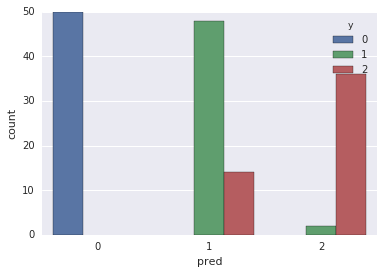

In [116]:
sns.countplot(x='pred',data=data,hue='y')

In [117]:
from sklearn import metrics
metrics.accuracy_score(y,pred)*100

89.333333333333329